<a href="https://colab.research.google.com/github/soneeybee/goldpriceanalysis/blob/main/goldprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gold_price.csv to gold_price.csv


In [ ]:
df = pd.read_csv('gold_price.csv',parse_dates=True,index_col='Date')

In [ ]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [ ]:
df['Return'] = df['USD (PM)'].pct_change()*100

In [ ]:
df['Return']

Date
2001-01-02         NaN
2001-01-03   -1.457027
2001-01-04   -0.018716
2001-01-05    0.112317
2001-01-08    0.336574
                ...   
2019-08-27    1.938423
2019-08-28    0.273982
2019-08-29    0.198419
2019-08-30   -0.766134
2019-09-02   -0.160298
Name: Return, Length: 4718, dtype: float64

In [ ]:
df['Lagged_Return']=df['Return'].shift()

In [ ]:
df['Lagged_Return']

Date
2001-01-02         NaN
2001-01-03         NaN
2001-01-04   -1.457027
2001-01-05   -0.018716
2001-01-08    0.112317
                ...   
2019-08-27    0.116507
2019-08-28    1.938423
2019-08-29    0.273982
2019-08-30    0.198419
2019-09-02   -0.766134
Name: Lagged_Return, Length: 4718, dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532


In [ ]:
train = df['2001':'2018']

In [ ]:
train

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.00,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.30,178.777,178.665,283.573,283.298,-0.262172,-0.484532
...,...,...,...,...,...,...,...,...
2018-12-19,1248.60,1255.00,986.770,990.700,1094.650,1098.130,0.698066,0.374502
2018-12-20,1255.00,1259.75,988.690,995.450,1093.730,1100.770,0.378486,0.698066
2018-12-21,1257.60,1258.15,993.760,994.820,1101.530,1103.400,-0.127009,0.378486


In [ ]:
test = df['2019']

In [ ]:
test

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2019-01-02,1287.20,1282.90,1014.44,1017.34,1125.27,1129.21,0.304926,0.000000
2019-01-03,1287.95,1290.45,1024.05,1024.49,1132.62,1132.24,0.588510,0.304926
2019-01-04,1290.35,1279.90,1016.80,1013.42,1131.51,1127.34,-0.817544,0.588510
2019-01-07,1291.50,1292.20,1013.83,1011.28,1129.03,1126.93,0.961013,-0.817544
2019-01-08,1283.90,1286.45,1006.71,1010.38,1121.62,1124.36,-0.444978,0.961013
...,...,...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88,1.938423,0.116507
2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43,0.273982,1.938423
2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03,0.198419,0.273982


In [ ]:
X_train = train['Lagged_Return'].to_frame()
Y_train = train['Return']
X_test = test['Lagged_Return'].to_frame()
Y_test = test['Return']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [ ]:
predictions

array([0.04097056, 0.04054037, 0.04014029, 0.04212394, 0.03961477,
       0.04159833, 0.04073478, 0.04060927, 0.04129271, 0.04055464,
       0.04079049, 0.04119944, 0.04114523, 0.04168104, 0.0414814 ,
       0.0406894 , 0.04122364, 0.04054064, 0.03984957, 0.04007103,
       0.0403855 , 0.04063069, 0.03961972, 0.04145566, 0.0416713 ,
       0.04075015, 0.04116379, 0.04122855, 0.04044824, 0.04187722,
       0.04058179, 0.04066901, 0.04111563, 0.04042193, 0.04001149,
       0.0400499 , 0.03995541, 0.04228292, 0.0412037 , 0.04075826,
       0.0416065 , 0.04120479, 0.04136516, 0.04174058, 0.04382559,
       0.04114617, 0.04074528, 0.0410309 , 0.03971376, 0.04140574,
       0.04050129, 0.03989374, 0.04220114, 0.04010484, 0.04074327,
       0.04074364, 0.04140209, 0.04033209, 0.04078742, 0.04008296,
       0.04131803, 0.04167794, 0.04253787, 0.04094333, 0.04117748,
       0.04131957, 0.04095416, 0.04176863, 0.04038784, 0.03970589,
       0.04064499, 0.04070529, 0.04168922, 0.04145936, 0.04191

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
out_of_sample_results = Y_test.to_frame()

In [ ]:
out_of_sample_results['out_of_sample_predictions'] = model.predict(X_test)

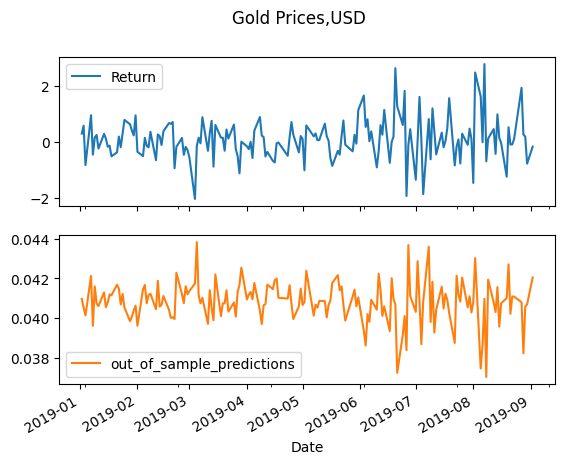

In [ ]:
out_of_sample_results.plot(subplots=True,title='Gold Prices,USD')
plt.show()